In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
data=pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
n = X_scaled.shape[0]
mean = np.mean(X_scaled, axis = 0)
centered = X_scaled - mean
cov_matrix = np.dot(centered.T, centered) / (n - 1)

In [133]:
def qr_decomposition(A, standard=False):

    m, n = A.shape  
    Q = np.eye(m)
    R = np.copy(A)
    if m == n: end = n-1
    else: end = n
    for i in range(0, end):
        H = np.eye(m)

        a = R[i:, i] 
        norm_a = np.linalg.norm(a)  # 
        if a[0] < 0.0: norm_a = -norm_a
        v = a / (a[0] + norm_a)
        v[0] = 1.0
        h = np.eye(len(a)) 
        h -= (2 / np.dot(v, v)) * \
        np.matmul(v[:,None], v[None,:])

        H[i:, i:] = h 
        Q = np.matmul(Q, H)
        R = np.matmul(H, R)

    if standard == True: 
        S = np.zeros((n,n)) 
        for i in range(n):
            if R[i][i] < 0.0: S[i][i] = -1.0
            else: S[i][i] = +1.0
        Q = np.matmul(Q, S)
        R = np.matmul(S, R)

    return Q, R


def is_upper_tri(A, tol):
    n = len(A)
    for i in range(0,n):
        for j in range(0,i):  # lower
            if np.abs(A[i][j]) > tol:
                return False
    return True


In [134]:
n = len(cov_matrix)
A = np.copy(cov_matrix)
pq = np.eye(n)
max_ct = 1000

ct = 0
while ct < max_ct:
    Q, R = qr_decomposition(A)
    pq = np.matmul(pq, Q) 
    A = np.matmul(R, Q) 
    ct += 1

    if is_upper_tri(A, 1.0e-8) == True:
        break 
if ct == max_ct:
    print("No convergence")

eigenvalues = np.zeros(n, dtype=np.float64)
for i in range(n):
    eigenvalues[i] = A[i][i]

eigenvectors = np.copy(pq)

In [135]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.09711056 1.73346726 1.03097228 0.87667054 0.76333832 0.68351839
 0.42036353 0.40498938]
Eigenvectors:
 [[-0.1284321   0.59378583 -0.01308692 -0.08069115 -0.47560573 -0.19359817
  -0.58878996 -0.11784137]
 [-0.39308257  0.17402908  0.46792282  0.40432871  0.46632804 -0.09416176
  -0.06015262 -0.4503553 ]
 [-0.36000261  0.18389207 -0.53549442 -0.05598649  0.32795306  0.6341159
  -0.19211793  0.01129541]
 [-0.43982428 -0.33196534 -0.2376738  -0.03797608 -0.48786206 -0.00958944
   0.28221289 -0.56628362]
 [-0.43502617 -0.25078106  0.33670893  0.34994376 -0.34693481  0.27065061
  -0.13201028  0.5486213 ]
 [-0.45194134 -0.1009598  -0.36186463 -0.05364595  0.25320376 -0.68537218
  -0.03536666  0.34151761]
 [-0.27061144 -0.122069    0.43318905 -0.8336801   0.11981049  0.08578409
  -0.08609108  0.00825868]
 [-0.19802707  0.62058853  0.07524755 -0.0712006  -0.10928996  0.03335717
   0.71208528  0.21166244]]


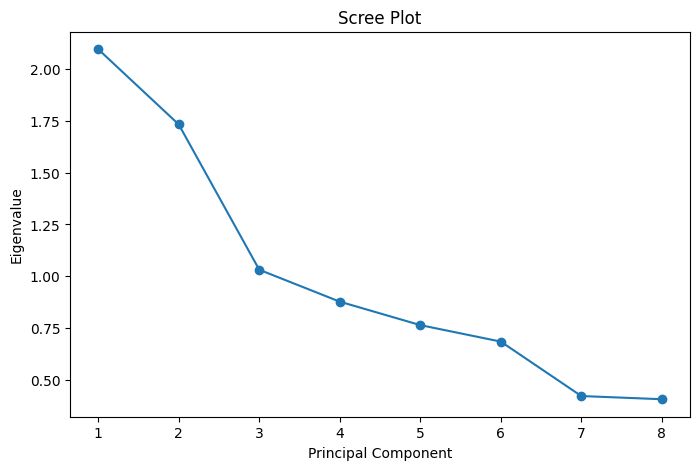

In [136]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues , marker = 'o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [137]:
k = 2
selected_eigenvectors = eigenvectors[:, :k]

X_pca = X_scaled @ selected_eigenvectors

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca["Outcome"] = data["Outcome"] 
print(df_pca)

          PC1       PC2  Outcome
0   -1.068503  1.234895        1
1    1.121683 -0.733852        0
2    0.396477  1.595876        1
3    1.115781 -1.271241        0
4   -2.359334 -2.184819        1
..        ...       ...      ...
763 -1.562085  1.923150        0
764  0.100405 -0.614181        0
765  0.283475  0.097065        0
766  1.060324  0.837062        1
767  0.839892 -1.151755        0

[768 rows x 3 columns]


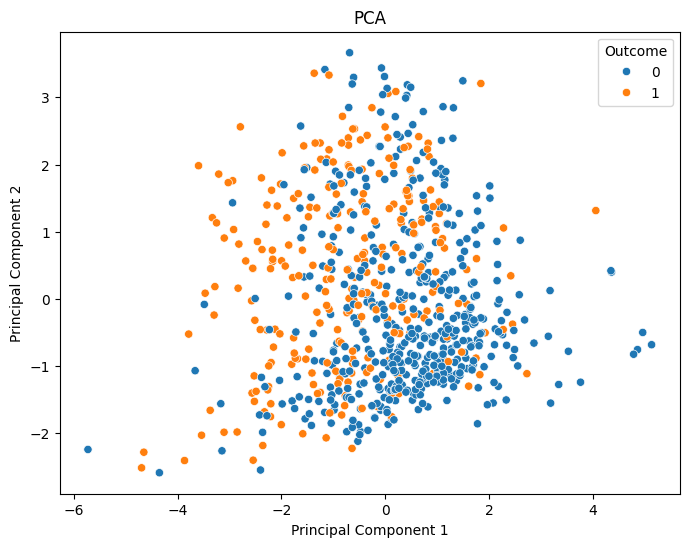

In [138]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Outcome"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA")
plt.show()